# This file contains python code to calculate LOWESS curves (fraction = 0.45) and potential inflection ages for this study's Sr and O isotope data sets

## Define modules and import data

In [1]:
#Import python modules

from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import sem, t
lowess = sm.nonparametric.lowess
from scipy.stats import sem, t
from scipy.interpolate import interp1d # for interpolation of new data points
import statistics as stats
import math as math

In [2]:
#Import and Define Data

fraction = 0.45 #fraction defines 'window' of data used to calculate LOWESS

filePoz = pd.read_excel('../Data/PozaryData.xlsx')

Age = filePoz['Age'].to_numpy()
Sr = filePoz['Sr'].to_numpy()
Sr_Error = filePoz['Sr Error'].to_numpy()
O = filePoz['O'].to_numpy()
O_Error = filePoz['O Error'].to_numpy()

[Text(0.5, 0, 'd$\\mathregular{^{18}}$O')]

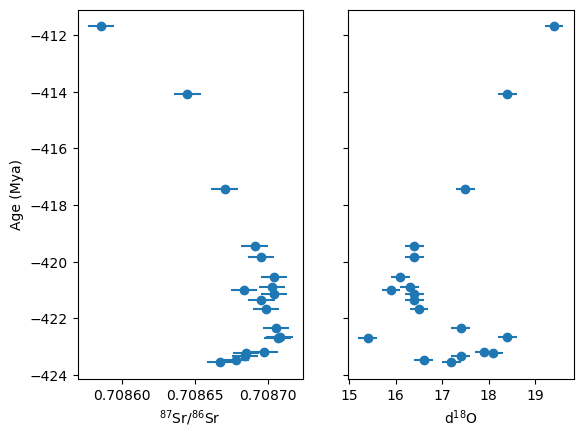

In [3]:
#Scatter Plots (Sr and O)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.errorbar(Sr, Age, xerr=Sr_Error, fmt="o")
ax1.set(xlabel='$\mathregular{^{87}Sr/^{86}Sr}$')
ax1.set(ylabel='Age (Mya)')

ax2.errorbar(O, Age, xerr=O_Error, fmt="o")
ax2.yaxis.set_ticklabels([])
ax2.set(xlabel='d$\mathregular{^{18}}$O')

## Calculate LOWESS

In [4]:
#Calculate LOWESS

Srlowess = lowess(Sr, Age, frac=fraction)
Olowess = lowess(O, Age, frac=fraction)

lowessdata = pd.DataFrame({'Age':Srlowess[:,0],'Sr LOWESS':Srlowess[:,1],'O LOWESS':Olowess[:,1]})

lowessdata

,Age,Sr LOWESS,O LOWESS
0,-423.562,0.708672,17.145498
1,-423.473,0.708676,17.320401
2,-423.331,0.708682,17.601300
3,-423.233,0.708686,17.796783
4,-423.189,0.708688,17.887059
5,-422.709,0.708702,17.572567
6,-422.681,0.708703,17.559376
7,-422.363,0.708704,17.343194
8,-421.685,0.708700,16.668349
9,-421.373,0.708700,16.450616


## Calculate LOWESS first and second derivatives

In [5]:
#LOWESS First Derivative

n = len(lowessdata)

# Sr curve
Srlowessfirstderiv = np.zeros(n)
for i in range(n):
    if i == 0:
        Srlowessfirstderiv[i] = np.NaN
    else:
        Srlowessfirstderiv[i] = (lowessdata['Sr LOWESS'][i] - lowessdata['Sr LOWESS'][i-1])/\
        (lowessdata['Age'][i] - lowessdata['Age'][i-1])

#O curve  
Olowessfirstderiv = np.zeros(n)
for i in range(n):
    if i == 0:
        Olowessfirstderiv[i] = np.NaN
    else:
        Olowessfirstderiv[i] = (lowessdata['O LOWESS'][i] - lowessdata['O LOWESS'][i-1])/\
        (lowessdata['Age'][i] - lowessdata['Age'][i-1])
            
        
#Make dataframe
lowessfirstderivdata = pd.DataFrame({'Age':lowessdata['Age'],'Sr LOWESS 1D':Srlowessfirstderiv,'O LOWESS 1D':Olowessfirstderiv})

lowessfirstderivdata

,Age,Sr LOWESS 1D,O LOWESS 1D
0,-423.562,NaN,NaN
1,-423.473,4.383932e-05,1.965211
2,-423.331,4.302861e-05,1.978161
3,-423.233,4.238803e-05,1.994723
4,-423.189,4.201526e-05,2.051724
5,-422.709,3.023380e-05,-0.655192
6,-422.681,2.136044e-05,-0.471126
7,-422.363,4.880888e-06,-0.679817
8,-421.685,-6.511544e-06,-0.995346
9,-421.373,8.717796e-07,-0.697862


In [6]:
#LOWESS Second Derivative

n = len(lowessdata)

# Sr curve
Srlowesssecondderiv = np.zeros(n)
for i in range(n):
    if i == 0:
        Srlowesssecondderiv[i]=np.NaN
    else:
        Srlowesssecondderiv[i] = (lowessfirstderivdata['Sr LOWESS 1D'][i] - lowessfirstderivdata['Sr LOWESS 1D'][i-1])/\
        (lowessfirstderivdata['Age'][i] - lowessfirstderivdata['Age'][i-1])

# O curve
Olowesssecondderiv = np.zeros(n)
for i in range(n):
    if i == 0:
        Olowesssecondderiv[i]=np.NaN
    else:
        Olowesssecondderiv[i] = (lowessfirstderivdata['O LOWESS 1D'][i] - lowessfirstderivdata['O LOWESS 1D'][i-1])/\
        (lowessfirstderivdata['Age'][i] - lowessfirstderivdata['Age'][i-1])

#Make dataframe
lowesssecondderivdata = pd.DataFrame({'Age':lowessdata['Age'],'Sr LOWESS 2D':Srlowesssecondderiv,'O LOWESS 2D':Olowesssecondderiv})

lowesssecondderivdata

,Age,Sr LOWESS 2D,O LOWESS 2D
0,-423.562,NaN,NaN
1,-423.473,NaN,NaN
2,-423.331,-5.709203e-06,0.091203
3,-423.233,-6.536527e-06,0.169000
4,-423.189,-8.472125e-06,1.295456
5,-422.709,-2.454471e-05,-5.639407
6,-422.681,-3.169055e-04,6.573770
7,-422.363,-5.182251e-05,-0.656261
8,-421.685,-1.680300e-05,-0.465381
9,-421.373,2.366450e-05,0.953472


In [7]:
#Combine Data

lowessgradientdata = pd.DataFrame({'Age':lowessdata['Age'],\
                                   'Sr LOWESS':lowessdata['Sr LOWESS'],\
                                   'Sr LOWESS 1D': lowessfirstderivdata['Sr LOWESS 1D'],\
                                   'Sr LOWESS 2D':lowesssecondderivdata['Sr LOWESS 2D'],\
                                   'O LOWESS':lowessdata['O LOWESS'],\
                                   'O LOWESS 1D': lowessfirstderivdata['O LOWESS 1D'],\
                                   'O LOWESS 2D':lowesssecondderivdata['O LOWESS 2D']})

lowessgradientdata

,Age,Sr LOWESS,Sr LOWESS 1D,Sr LOWESS 2D,O LOWESS,O LOWESS 1D,O LOWESS 2D
0,-423.562,0.708672,NaN,NaN,17.145498,NaN,NaN
1,-423.473,0.708676,4.383932e-05,NaN,17.320401,1.965211,NaN
2,-423.331,0.708682,4.302861e-05,-5.709203e-06,17.601300,1.978161,0.091203
3,-423.233,0.708686,4.238803e-05,-6.536527e-06,17.796783,1.994723,0.169000
4,-423.189,0.708688,4.201526e-05,-8.472125e-06,17.887059,2.051724,1.295456
5,-422.709,0.708702,3.023380e-05,-2.454471e-05,17.572567,-0.655192,-5.639407
6,-422.681,0.708703,2.136044e-05,-3.169055e-04,17.559376,-0.471126,6.573770
7,-422.363,0.708704,4.880888e-06,-5.182251e-05,17.343194,-0.679817,-0.656261
8,-421.685,0.708700,-6.511544e-06,-1.680300e-05,16.668349,-0.995346,-0.465381
9,-421.373,0.708700,8.717796e-07,2.366450e-05,16.450616,-0.697862,0.953472


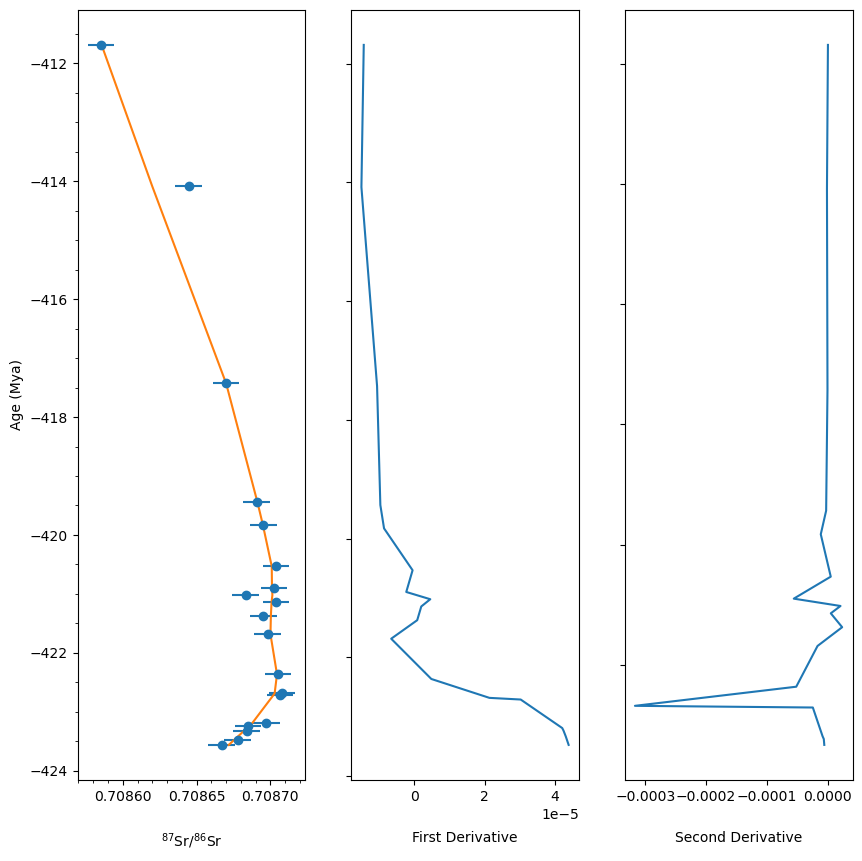

In [8]:
#Plot Sr LOWESS and Data

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,10))

ax1.errorbar(Sr, Age, xerr=Sr_Error, fmt="o")
ax1.plot(lowessgradientdata['Sr LOWESS'],lowessgradientdata['Age'])
ax1.yaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.set(xlabel='$\mathregular{^{87}Sr/^{86}Sr}$')
ax1.set(ylabel='Age (Mya)')
ax1.xaxis.labelpad = 20

ax2.plot(lowessgradientdata['Sr LOWESS 1D'],lowessgradientdata['Age'])
ax2.yaxis.set_ticklabels([])
ax2.set(xlabel='First Derivative')
ax2.xaxis.labelpad = 20

ax3.plot(lowessgradientdata['Sr LOWESS 2D'],lowessgradientdata['Age'])
ax3.yaxis.set_ticklabels([])
ax3.set(xlabel='Second Derivative')
ax3.xaxis.labelpad = 20

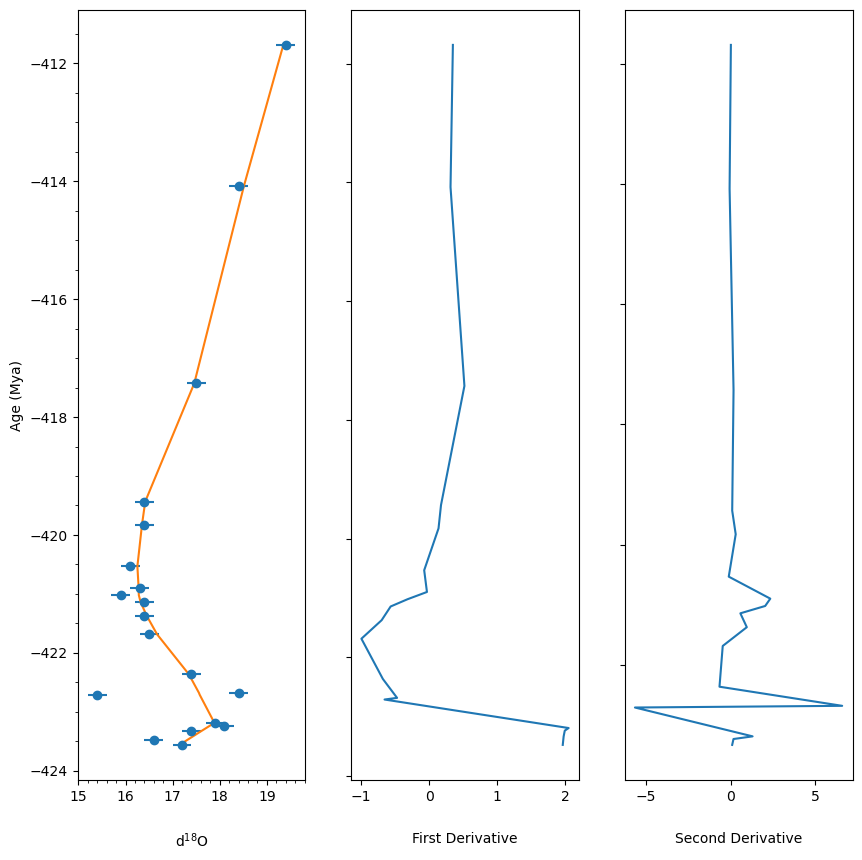

In [9]:
#Plot O LOWESS and Data

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,10))

ax1.errorbar(O, Age, xerr=O_Error, fmt="o")
ax1.plot(lowessgradientdata['O LOWESS'],lowessgradientdata['Age'])
ax1.yaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.set(xlabel='d$\mathregular{^{18}}$O')
ax1.set(ylabel='Age (Mya)')
ax1.xaxis.labelpad = 20

ax2.plot(lowessgradientdata['O LOWESS 1D'],lowessgradientdata['Age'])
ax2.yaxis.set_ticklabels([])
ax2.set(xlabel='First Derivative')
ax2.xaxis.labelpad = 20

ax3.plot(lowessgradientdata['O LOWESS 2D'],lowessgradientdata['Age'])
ax3.yaxis.set_ticklabels([])
ax3.set(xlabel='Second Derivative')
ax3.xaxis.labelpad = 20

## Calculate inflection point

We define the inflection point for <b>Sr</b> as the <b>lowest</b> value of the second derivative curve (since Sr is inflecting to a lower value)

We define the inflection point for <b>O</b> as the <b>highest</b> value of the second derivative curve (since O is inflecting to a higher value)

In [10]:
#Find inflection points

Srinf = lowessgradientdata['Age'][lowessgradientdata['Sr LOWESS 2D'].idxmin()]
Oinf = lowessgradientdata['Age'][lowessgradientdata['O LOWESS 2D'].idxmax()]

print('With LOWESS fraction =',fraction,', the inflection point occurs at',\
      round(Srinf,1),'Ma for Sr and',round(Oinf,1),'Ma for O')

With LOWESS fraction = 0.45 , the inflection point occurs at -422.7 Ma for Sr and -422.7 Ma for O


In [11]:
#Export data

df = pd.DataFrame({'Fraction':[fraction],'Sr Inflection Age':[Srinf],'O Inflection Age':[Oinf]})

df.to_csv(r'./Results/inf_45.csv',index=False)